# Synchronization

In [37]:
using Plots
using LinearAlgebra: tr
using PlotThemes

In [205]:
theme(:dark)

In [206]:
"""
Second-order Runge-Kutta ODE
"""
function rk2(fs, initial_conditions, Δt, T)
    yn = initial_conditions[:]
    n_steps = Int(T / Δt + 1)
    n_params = length(initial_conditions)
    
    hist = zeros(n_steps, n_params)
    hist[1, :] = yn
    for ti=2:n_steps
        k1 = Δt .* [f(yn...) for f in fs]
        k2 = Δt .* [f(yn + k1 / 2...) for f in fs]
        yn = yn + k2
        hist[ti, :] = yn
    end
    return hist
end

rk2

In [207]:
a = 5
df1  = (x, y) -> -(x + y), (x, y) -> a * x - y

Xinit_1 = [1.0, -1.5]
Xinit_2 = [0.4, -0.9]
Xt1 = rk2(df1, Xinit_1, 0.01, 5)
Xt2 = rk2(df1, Xinit_2, 0.01, 5)

timesteps, _ = size(Xt1)
xmin, ymin = minimum(Xt1, dims=1)
xmax, ymax = maximum(Xt1, dims=1);

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/review-notebooks/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/review-notebooks/tmp.gif")
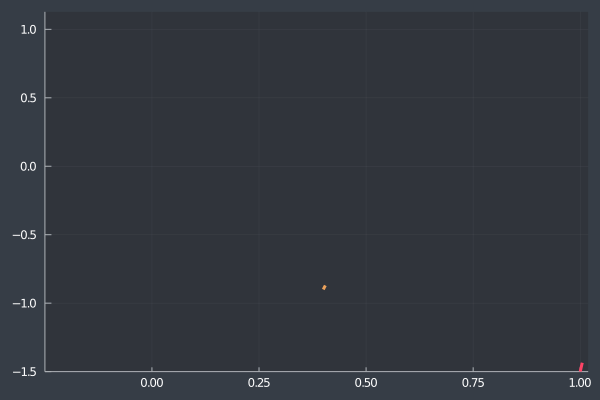

In [209]:
@gif for ti=2:500
    plot(Xt1[begin:ti, 1], Xt1[begin:ti, 2], linewidth=3, label=nothing)
    plot!(Xt2[begin:ti, 1], Xt2[begin:ti, 2], linewidth=3, label=nothing)
    xlims!(xmin, xmax)
    ylims!(ymin, ymax)
end every 10

## Synchronization of dyanamical systems

$$
    \dot x = f(x, y) - K (x - y)\\
    \dot y = f(x, y) - K (x - y)
$$

In [315]:
a = 3
Δt, T = 0.01, 8
n_steps = Int(T / Δt + 1)
f3  = (x, y) -> -(x + y), (x, y) -> a * x - y

(var"#333#335"(), var"#334#336"())

In [316]:
K = -0.6
# size(xn) == (2,1)
F3 = ((x11, x12, x21, x22) -> f3[1](x11, x12) - K * (x11 - x21),
      (x11, x12, x21, x22) -> f3[2](x11, x12) - K * (x12 - x22), #(x21 - x22)
      (x11, x12, x21, x22) -> f3[1](x21, x22) - K * (x21 - x11),
      (x11, x12, x21, x22) -> f3[2](x21, x22) - K * (x22 - x12)) # (x22 - x21)

(var"#337#341"(), var"#338#342"(), var"#339#343"(), var"#340#344"())

In [317]:
X0 = [1.0, -1.5, 0.4, -0.9]
Xt = rk2(F3, X0, Δt, T)
Xt1 = Xt[:, begin:2]
Xt2 = Xt[:, 3:end]

801×2 Array{Float64,2}:
  0.4       -0.9
  0.401248  -0.875552
  0.402201  -0.851417
  0.402864  -0.827601
  0.403245  -0.804111
  0.40335   -0.780954
  0.403188  -0.758135
  0.402765  -0.735662
  0.402088  -0.713538
  0.401165  -0.69177
  0.400002  -0.670362
  0.398606  -0.64932
  0.396984  -0.628647
  ⋮         
 -1.4071    -1.58501
 -1.39383   -1.63024
 -1.38008   -1.67517
 -1.36586   -1.71976
 -1.35116   -1.764
 -1.33599   -1.80789
 -1.32035   -1.8514
 -1.30425   -1.89452
 -1.28769   -1.93724
 -1.27066   -1.97954
 -1.25319   -2.0214
 -1.23526   -2.06282

In [318]:
xmin, ymin = minimum([Xt1; Xt2], dims=1)
xmax, ymax = maximum([Xt1; Xt2], dims=1)

1×2 Array{Float64,2}:
 1.58165  2.28229

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/review-notebooks/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/review-notebooks/tmp.gif")
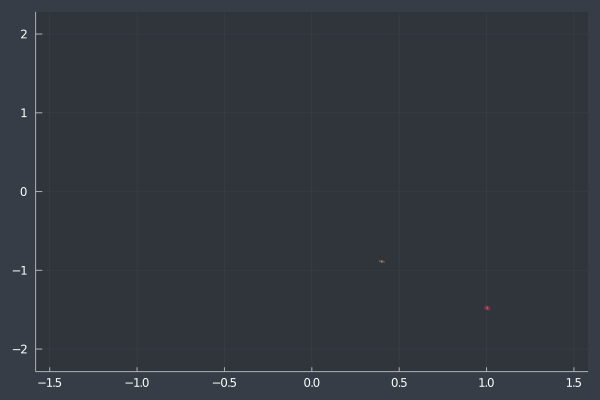

In [319]:
@gif for ti=2:n_steps
    plot(Xt1[begin:ti, 1], Xt1[begin:ti, 2], linewidth=1, label=nothing, color="#FE4365")
    plot!(Xt1[begin:ti, 1], Xt1[begin:ti, 2], linewidth=6,
          label=nothing, color="#FE4365", seriesalpha=0.3)
    
    plot!(Xt2[begin:ti, 1], Xt2[begin:ti, 2], linewidth=1, label=nothing, color="#eca25c")
    plot!(Xt2[begin:ti, 1], Xt2[begin:ti, 2], linewidth=6,
          label=nothing, color="#eca25c", seriesalpha=0.3)
    xlims!(xmin, xmax)
    ylims!(ymin, ymax)
end every 10

### Testing different values for K

In [ ]:
K = -0.6
# size(xn) == (2,1)
F3 = ((x11, x12, x21, x22) -> f3[1](x11, x12) - K * (x11 - x21),
      (x11, x12, x21, x22) -> f3[2](x11, x12) - K * (x12 - x22), #(x21 - x22)
      (x11, x12, x21, x22) -> f3[1](x21, x22) - K * (x21 - x11),
      (x11, x12, x21, x22) -> f3[2](x21, x22) - K * (x22 - x12)) # (x22 - x21)b

In [257]:
function simple_linear_sync(X0, K, Δt, T)
    F = ((x11, x12, x21, x22) -> f3[1](x11, x12) - K * (x11 - x21),
         (x11, x12, x21, x22) -> f3[2](x11, x12) - K * (x12 - x22),
         (x11, x12, x21, x22) -> f3[1](x21, x22) - K * (x21 - x11),
         (x11, x12, x21, x22) -> f3[2](x21, x22) - K * (x22 - x12))
    Xt = rk2(F, X0, Δt, T)
    Xt1 = Xt[:, begin:2]
    Xt2 = Xt[:, 3:end]
    return Xt1, Xt2
end

simple_linear_sync (generic function with 1 method)

In [309]:
Δt, T = 0.01, 6
n_steps = Int(T / Δt + 1)
X0 = [1.0, -1.5, 0.4, -0.9]
K = -0.6
Xt1, Xt2 = simple_linear_sync(X0, K, Δt, T)

([1.0 -1.5; 1.0083716 -1.4586276; … ; -1.0473367346669176 -0.8244113946617397; -1.040986863299945 -0.8574116447810853], [0.4 -0.9; 0.4012484 -0.8755524; … ; 1.042480066354051 0.8229676484503717; 1.036193540424531 0.85583823735756])

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/review-notebooks/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/review-notebooks/tmp.gif")
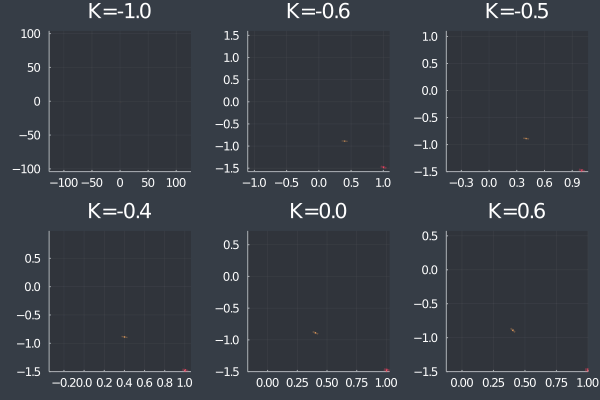

In [314]:
K_vals = [-1, -0.6, -0.5, -0.4, 0, 0.6]
nk_vals = length(K_vals)
simulations = [simple_linear_sync(X0, K, Δt, T) for K in K_vals]

@gif for ti=2:n_steps
    plots = Array{Any}(nothing, nk_vals)
    for (n, (Xt1, Xt2)) in enumerate(simulations)
        xmin, ymin = minimum([Xt1; Xt2], dims=1)
        xmax, ymax = maximum([Xt1; Xt2], dims=1)
        p = plot(Xt1[begin:ti, 1], Xt1[begin:ti, 2], label=nothing, color="#FE4365",
            linewidth=1)
        plot!(Xt1[begin:ti, 1], Xt1[begin:ti, 2], label=nothing, color="#FE4365",
            linewidth=6, seriesalpha=0.3)
        
        plot!(Xt2[begin:ti, 1], Xt2[begin:ti, 2], label=nothing, color="#eca25c",
             linewidth=1)
        plot!(Xt2[begin:ti, 1], Xt2[begin:ti, 2], label=nothing, color="#eca25c",
             linewidth=6, seriesalpha=0.3)
        plot!(title="K=$(K_vals[n])")
        xlims!(xmin, xmax)
        ylims!(ymin, ymax)

        plots[n] = p
    end
    plot(plots...)
end every 10